In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt



def create_circuit():
    qreg_q = QuantumRegister(4, 'q')
    creg_c = ClassicalRegister(4, 'c')
    circuit = QuantumCircuit(qreg_q, creg_c)
    for I in range(L):
        circuit.rx(theta[2*I][0], qreg_q[0])
        circuit.rx(theta[2*I][1], qreg_q[1])
        circuit.rx(theta[2*I][2], qreg_q[2])
        circuit.rx(theta[2*I][3], qreg_q[3])
        circuit.rz(theta[2*I+1][0], qreg_q[0])
        circuit.rz(theta[2*I+1][1], qreg_q[1])
        circuit.rz(theta[2*I+1][2], qreg_q[2])
        circuit.rz(theta[2*I+1][3], qreg_q[3])
        circuit.cz(qreg_q[0], qreg_q[1])
        circuit.cz(qreg_q[0], qreg_q[2])
        circuit.cz(qreg_q[0], qreg_q[3])
        circuit.cz(qreg_q[1], qreg_q[2])
        circuit.cz(qreg_q[1], qreg_q[3])
        circuit.cz(qreg_q[2], qreg_q[3])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[0])
        circuit.barrier(qreg_q[1])
    return circuit


# randomly assign phi
rndvec = []
for i in range(16):
    x=np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
    y=np.random.uniform(-1,1)+1j*np.random.uniform(-1,1)
    rndvec.append(x+1j*y)
phi = rndvec/np.linalg.norm(rndvec)


epsilon = [[],[],[],[],[]]


backend_sim = Aer.get_backend('statevector_simulator')

# stepsize for calculating gradients
step = np.pi/2000


for L in range(1,6):
    
    # randomly assign theta
    theta = []
    for I in range(2*L):
        theta.append(np.random.uniform(0,2*np.pi,4))
    
    gradients = np.zeros(np.shape(theta))
    lrate = 1/(2*L-1)
    
    for iteration in range(1500):
        if iteration in [50, 100, 300, 600, 900, 1200]:
            lrate = lrate/2
        circ = create_circuit()
        job = execute(circ, backend_sim)
        psi = job.result().get_statevector(circ)
        epsilon[L-1].append(np.linalg.norm(phi-psi))
        
        # calculating gradients
        for l in range(2*L):
            for qbit in range(4):
                theta[l][qbit] += step
                tcirc = create_circuit()
                job = execute(tcirc, backend_sim)
                tpsi = job.result().get_statevector(tcirc)
                theta[l][qbit] -= step
                gradients[l][qbit] = (np.linalg.norm(phi-tpsi)-epsilon[L-1][-1])/step
        
        theta -= lrate*gradients
        print(L, iteration, epsilon[L-1][-1])
        

plt.bar(['1','2','3','4','5'],np.transpose(epsilon)[-1])
plt.xlabel("Layers")
plt.ylabel("Epsilon")
plt.show()

1 0 1.3794409959726055
1 1 1.242286986011714
1 2 1.1444992445077409
1 3 1.0962479913726013
1 4 1.0661167468257484
1 5 1.0434284398563305
1 6 1.0266009404451037
1 7 1.014352534613811
1 8 1.005426552446129
1 9 0.9987946114347478
1 10 0.9937035596399444
1 11 0.989638500185882
1 12 0.9862622952321694
1 13 0.9833600857541609
1 14 0.9807971767375735
1 15 0.9784898506093923
1 16 0.9763861229047911
1 17 0.9744534187808848
1 18 0.9726708267025953
1 19 0.9710242955191036
1 20 0.9695036946591358
1 21 0.9681010428909297
1 22 0.9668094656068419
1 23 0.9656226037492924
1 24 0.9645343005019555
1 25 0.9635384564524075
1 26 0.9626289843787383
1 27 0.9617998202315892
1 28 0.9610449629737634
1 29 0.960358526225627
1 30 0.9597347913112493
1 31 0.9591682556352152
1 32 0.9586536731604163
1 33 0.9581860856112541
1 34 0.957760844217047
1 35 0.9573736225464778
1 36 0.9570204214066684
1 37 0.9566975669873925
1 38 0.9564017034915101
1 39 0.9561297814572048
1 40 0.9558790428826276
1 41 0.9556470041355623
1 42 0.9

1 336 0.9469833079452986
1 337 0.9469768184265713
1 338 0.9469703460517664
1 339 0.9469638908093632
1 340 0.9469574526876753
1 341 0.9469510316748506
1 342 0.9469446277588734
1 343 0.9469382409275628
1 344 0.9469318711685755
1 345 0.9469255184694048
1 346 0.9469191828173825
1 347 0.9469128641996789
1 348 0.946906562603303
1 349 0.9469002780151049
1 350 0.9468940104217742
1 351 0.9468877598098426
1 352 0.9468815261656833
1 353 0.946875309475512
1 354 0.9468691097253885
1 355 0.9468629269012153
1 356 0.9468567609887408
1 357 0.9468506119735577
1 358 0.9468444798411058
1 359 0.9468383645766706
1 360 0.9468322661653854
1 361 0.9468261845922314
1 362 0.9468201198420394
1 363 0.9468140718994885
1 364 0.9468080407491086
1 365 0.9468020263752807
1 366 0.9467960287622366
1 367 0.9467900478940611
1 368 0.9467840837546918
1 369 0.9467781363279199
1 370 0.946772205597391
1 371 0.946766291546606
1 372 0.9467603941589214
1 373 0.9467545134175507
1 374 0.9467486493055641
1 375 0.9467428018058905
1 37

1 666 0.9457204802018958
1 667 0.945719284315258
1 668 0.9457180908239335
1 669 0.9457168997242621
1 670 0.9457157110125838
1 671 0.9457145246852418
1 672 0.94571334073858
1 673 0.9457121591689459
1 674 0.9457109799726876
1 675 0.9457098031461554
1 676 0.9457086286857023
1 677 0.9457074565876821
1 678 0.9457062868484517
1 679 0.9457051194643693
1 680 0.9457039544317954
1 681 0.9457027917470927
1 682 0.9457016314066257
1 683 0.9457004734067608
1 684 0.9456993177438666
1 685 0.9456981644143143
1 686 0.9456970134144762
1 687 0.9456958647407275
1 688 0.9456947183894454
1 689 0.9456935743570085
1 690 0.9456924326397987
1 691 0.9456912932341992
1 692 0.9456901561365956
1 693 0.9456890213433756
1 694 0.9456878888509292
1 695 0.9456867586556484
1 696 0.9456856307539278
1 697 0.9456845051421635
1 698 0.9456833818167547
1 699 0.945682260774102
1 700 0.9456811420106088
1 701 0.9456800255226806
1 702 0.9456789113067249
1 703 0.9456777993591519
1 704 0.9456766896763739
1 705 0.9456755822548053
1 70

1 996 0.9454652471941725
1 997 0.9454649190985277
1 998 0.9454645913708403
1 999 0.9454642640107589
1 1000 0.9454639370179324
1 1001 0.94546361039201
1 1002 0.9454632841326414
1 1003 0.9454629582394758
1 1004 0.9454626327121634
1 1005 0.9454623075503543
1 1006 0.9454619827536989
1 1007 0.9454616583218476
1 1008 0.9454613342544512
1 1009 0.945461010551161
1 1010 0.945460687211628
1 1011 0.9454603642355038
1 1012 0.9454600416224401
1 1013 0.9454597193720888
1 1014 0.9454593974841021
1 1015 0.9454590759581324
1 1016 0.9454587547938321
1 1017 0.9454584339908546
1 1018 0.9454581135488525
1 1019 0.9454577934674793
1 1020 0.9454574737463886
1 1021 0.9454571543852339
1 1022 0.9454568353836694
1 1023 0.9454565167413495
1 1024 0.9454561984579286
1 1025 0.945455880533061
1 1026 0.9454555629664019
1 1027 0.9454552457576065
1 1028 0.94545492890633
1 1029 0.9454546124122282
1 1030 0.9454542962749567
1 1031 0.9454539804941717
1 1032 0.9454536650695297
1 1033 0.9454533500006866
1 1034 0.94545303528729

1 1314 0.9453911154111245
1 1315 0.9453909937395709
1 1316 0.9453908721390509
1 1317 0.9453907506095284
1 1318 0.9453906291509668
1 1319 0.9453905077633298
1 1320 0.945390386446581
1 1321 0.9453902652006839
1 1322 0.9453901440256022
1 1323 0.9453900229212996
1 1324 0.9453899018877399
1 1325 0.9453897809248865
1 1326 0.9453896600327032
1 1327 0.9453895392111537
1 1328 0.9453894184602016
1 1329 0.945389297779811
1 1330 0.9453891771699452
1 1331 0.9453890566305684
1 1332 0.945388936161644
1 1333 0.9453888157631359
1 1334 0.945388695435008
1 1335 0.9453885751772241
1 1336 0.945388454989748
1 1337 0.9453883348725435
1 1338 0.9453882148255747
1 1339 0.945388094848805
1 1340 0.9453879749421988
1 1341 0.9453878551057198
1 1342 0.9453877353393317
1 1343 0.9453876156429987
1 1344 0.9453874960166848
1 1345 0.9453873764603538
1 1346 0.9453872569739697
1 1347 0.9453871375574965
1 1348 0.9453870182108981
1 1349 0.945386898934139
1 1350 0.9453867797271825
1 1351 0.9453866605899931
1 1352 0.9453865415

2 141 0.7228535130506938
2 142 0.7227227760762207
2 143 0.7225912758044283
2 144 0.7224589918144113
2 145 0.7223259035122537
2 146 0.722191990126138
2 147 0.7220572307015697
2 148 0.7219216040967131
2 149 0.7217850889778392
2 150 0.7216476638148778
2 151 0.7215093068770795
2 152 0.7213699962287786
2 153 0.7212297097252609
2 154 0.7210884250087317
2 155 0.720946119504387
2 156 0.7208027704165835
2 157 0.7206583547251111
2 158 0.7205128491815638
2 159 0.7203662303058158
2 160 0.7202184743825959
2 161 0.7200695574581658
2 162 0.7199194553371048
2 163 0.7197681435791986
2 164 0.7196155974964359
2 165 0.7194617921501143
2 166 0.719306702348061
2 167 0.7191503026419638
2 168 0.7189925673248239
2 169 0.7188334704285273
2 170 0.7186729857215394
2 171 0.7185110867067298
2 172 0.7183477466193277
2 173 0.7181829384250117
2 174 0.7180166348181423
2 175 0.7178488082201383
2 176 0.7176794307780007
2 177 0.717508474362998
2 178 0.7173359105695053
2 179 0.7171617107140138
2 180 0.716985845834312
2 181

2 471 0.6212305480802558
2 472 0.6209785159026759
2 473 0.6207277531893324
2 474 0.6204782630698142
2 475 0.6202300484836777
2 476 0.619983112181822
2 477 0.6197374567279187
2 478 0.6194930844998904
2 479 0.6192499976914414
2 480 0.6190081983136343
2 481 0.6187676881965147
2 482 0.6185284689907803
2 483 0.6182905421694923
2 484 0.618053909029832
2 485 0.617818570694893
2 486 0.6175845281155166
2 487 0.6173517820721613
2 488 0.6171203331768091
2 489 0.6168901818749066
2 490 0.6166613284473365
2 491 0.6164337730124223
2 492 0.6162075155279609
2 493 0.6159825557932828
2 494 0.6157588934513399
2 495 0.6155365279908168
2 496 0.6153154587482654
2 497 0.615095684910263
2 498 0.6148772055155872
2 499 0.6146600194574124
2 500 0.6144441254855229
2 501 0.6142295222085401
2 502 0.6140162080961673
2 503 0.6138041814814443
2 504 0.613593440563015
2 505 0.6133839834074042
2 506 0.6131758079513062
2 507 0.6129689120038766
2 508 0.6127632932490334
2 509 0.612558949247761
2 510 0.6123558774404197
2 511 

2 801 0.5910788028326048
2 802 0.59105276248829
2 803 0.5910268103803851
2 804 0.5910009461350053
2 805 0.5909751693797775
2 806 0.5909494797438344
2 807 0.5909238768578109
2 808 0.5908983603538391
2 809 0.5908729298655448
2 810 0.590847585028042
2 811 0.5908223254779288
2 812 0.5907971508532837
2 813 0.5907720607936598
2 814 0.5907470549400818
2 815 0.5907221329350403
2 816 0.5906972944224881
2 817 0.5906725390478352
2 818 0.5906478664579452
2 819 0.5906232763011297
2 820 0.5905987682271443
2 821 0.5905743418871846
2 822 0.5905499969338809
2 823 0.5905257330212942
2 824 0.5905015498049117
2 825 0.5904774469416416
2 826 0.5904534240898104
2 827 0.5904294809091558
2 828 0.5904056170608247
2 829 0.5903818322073666
2 830 0.5903581260127312
2 831 0.5903344981422615
2 832 0.5903109482626916
2 833 0.5902874760421404
2 834 0.5902640811501084
2 835 0.5902407632574725
2 836 0.5902175220364815
2 837 0.590194357160752
2 838 0.5901712683052629
2 839 0.5901482551463525
2 840 0.5901253173617128
2 84

2 1126 0.587055412228857
2 1127 0.5870485634782964
2 1128 0.587041723731802
2 1129 0.5870348929708307
2 1130 0.5870280711768817
2 1131 0.5870212583314967
2 1132 0.5870144544162594
2 1133 0.5870076594127954
2 1134 0.5870008733027723
2 1135 0.5869940960678997
2 1136 0.5869873276899286
2 1137 0.586980568150652
2 1138 0.5869738174319046
2 1139 0.5869670755155623
2 1140 0.5869603423835421
2 1141 0.5869536180178032
2 1142 0.5869469024003452
2 1143 0.5869401955132092
2 1144 0.5869334973384773
2 1145 0.5869268078582724
2 1146 0.5869201270547585
2 1147 0.5869134549101402
2 1148 0.5869067914066628
2 1149 0.5869001365266121
2 1150 0.5868934902523149
2 1151 0.5868868525661377
2 1152 0.5868802234504876
2 1153 0.5868736028878122
2 1154 0.586866990860599
2 1155 0.5868603873513757
2 1156 0.5868537923427097
2 1157 0.5868472058172085
2 1158 0.5868406277575194
2 1159 0.5868340581463294
2 1160 0.5868274969663653
2 1161 0.586820944200393
2 1162 0.5868143998312181
2 1163 0.5868078638416855
2 1164 0.58680133

2 1443 0.5858673236758187
2 1444 0.5858646261141394
2 1445 0.5858619300733166
2 1446 0.5858592355518706
2 1447 0.5858565425483238
2 1448 0.5858538510611996
2 1449 0.585851161089024
2 1450 0.5858484726303241
2 1451 0.5858457856836287
2 1452 0.5858431002474686
2 1453 0.5858404163203758
2 1454 0.5858377339008847
2 1455 0.5858350529875307
2 1456 0.5858323735788517
2 1457 0.5858296956733863
2 1458 0.5858270192696753
2 1459 0.5858243443662614
2 1460 0.5858216709616885
2 1461 0.5858189990545025
2 1462 0.5858163286432512
2 1463 0.585813659726483
2 1464 0.5858109923027496
2 1465 0.5858083263706031
2 1466 0.5858056619285974
2 1467 0.585802998975289
2 1468 0.5858003375092349
2 1469 0.5857976775289945
2 1470 0.5857950190331285
2 1471 0.5857923620201995
2 1472 0.5857897064887717
2 1473 0.5857870524374109
2 1474 0.5857843998646844
2 1475 0.5857817487691616
2 1476 0.5857790991494131
2 1477 0.5857764510040111
2 1478 0.5857738043315301
2 1479 0.5857711591305456
2 1480 0.5857685153996349
2 1481 0.585765

3 271 0.28795168738437543
3 272 0.28788087069572044
3 273 0.287810696059097
3 274 0.28774115208338846
3 275 0.2876722275838674
3 276 0.2876039115782881
3 277 0.28753619328304897
3 278 0.2874690621094278
3 279 0.287402507659882
3 280 0.28733651972442004
3 281 0.2872710882770377
3 282 0.2872062034722201
3 283 0.28714185564150985
3 284 0.2870780352901379
3 285 0.2870147330937179
3 286 0.2869519398950012
3 287 0.28688964670069406
3 288 0.2868278446783345
3 289 0.28676652515322765
3 290 0.2867056796054382
3 291 0.2866452996668428
3 292 0.2865853771182347
3 293 0.286525903886487
3 294 0.28646687204176746
3 295 0.28640827379480877
3 296 0.2863501014942291
3 297 0.28629234762390654
3 298 0.2862350048004015
3 299 0.2861780657704322
3 300 0.2861215234083952
3 301 0.2860934229885174
3 302 0.2860654186914066
3 303 0.2860375096665577
3 304 0.28600969507109564
3 305 0.28598197406963494
3 306 0.28595434583416723
3 307 0.28592680954396477
3 308 0.28589936438549834
3 309 0.2858720095523582
3 310 0.2858

3 595 0.2798574482737198
3 596 0.27983889620096636
3 597 0.27982034661784666
3 598 0.2798017994481224
3 599 0.2797832546162345
3 600 0.2797647120472985
3 601 0.2797554417391802
3 602 0.27974617196296425
3 603 0.2797369027096475
3 604 0.2797276339702387
3 605 0.2797183657357648
3 606 0.2797090979972758
3 607 0.2796998307458471
3 608 0.2796905639725842
3 609 0.2796812976686233
3 610 0.2796720318251345
3 611 0.2796627664333217
3 612 0.2796535014844248
3 613 0.2796442369697204
3 614 0.27963497288052175
3 615 0.27962570920818036
3 616 0.279616445944085
3 617 0.2796071830796634
3 618 0.27959792060638156
3 619 0.2795886585157437
3 620 0.279579396799293
3 621 0.27957013544861176
3 622 0.27956087445532035
3 623 0.2795516138110781
3 624 0.27954235350758333
3 625 0.27953309353657246
3 626 0.2795238338898208
3 627 0.2795145745591424
3 628 0.27950531553638913
3 629 0.27949605681345197
3 630 0.2794867983822594
3 631 0.2794775402347783
3 632 0.27946828236301413
3 633 0.2794590247590098
3 634 0.279449

3 918 0.27689412621385817
3 919 0.276889438545097
3 920 0.2768847506838189
3 921 0.2768800626299816
3 922 0.27687537438354365
3 923 0.276870685944465
3 924 0.2768659973127063
3 925 0.2768613084882294
3 926 0.2768566194709978
3 927 0.2768519302609754
3 928 0.2768472408581275
3 929 0.2768425512624208
3 930 0.27683786147382283
3 931 0.27683317149230247
3 932 0.2768284813178295
3 933 0.2768237909503754
3 934 0.27681910038991203
3 935 0.2768144096364132
3 936 0.2768097186898532
3 937 0.2768050275502082
3 938 0.2768003362174549
3 939 0.27679564469157164
3 940 0.2767909529725377
3 941 0.27678626106033355
3 942 0.276781568954941
3 943 0.2767768766563428
3 944 0.2767721841645232
3 945 0.2767674914794673
3 946 0.2767627986011613
3 947 0.27675810552959335
3 948 0.2767534122647519
3 949 0.27674871880662694
3 950 0.2767440251552096
3 951 0.27673933131049233
3 952 0.2767346372724687
3 953 0.2767299430411331
3 954 0.27672524861648157
3 955 0.27672055399851125
3 956 0.27671585918722025
3 957 0.2767111

3 1232 0.27548886062001837
3 1233 0.27548648961393396
3 1234 0.2754841185686126
3 1235 0.2754817474840878
3 1236 0.2754793763603931
3 1237 0.27547700519756196
3 1238 0.2754746339956283
3 1239 0.2754722627546257
3 1240 0.27546989147458795
3 1241 0.2754675201555489
3 1242 0.27546514879754225
3 1243 0.2754627774006021
3 1244 0.27546040596476223
3 1245 0.2754580344900567
3 1246 0.2754556629765197
3 1247 0.27545329142418523
3 1248 0.2754509198330875
3 1249 0.27544854820326065
3 1250 0.275446176534739
3 1251 0.27544380482755687
3 1252 0.27544143308174857
3 1253 0.2754390612973486
3 1254 0.27543668947439137
3 1255 0.2754343176129115
3 1256 0.2754319457129435
3 1257 0.27542957377452193
3 1258 0.27542720179768154
3 1259 0.27542482978245686
3 1260 0.2754224577288832
3 1261 0.27542008563699494
3 1262 0.2754177135068271
3 1263 0.27541534133841455
3 1264 0.2754129691317925
3 1265 0.2754105968869956
3 1266 0.27540822460405934
3 1267 0.2754058522830188
3 1268 0.275403479923909
3 1269 0.27540110752676

4 48 0.33659994994404846
4 49 0.3302265940953589
4 50 0.32404154069735897
4 51 0.3210316552855013
4 52 0.31806866413006957
4 53 0.3151525984537681
4 54 0.31228341740455473
4 55 0.3094610129404595
4 56 0.30668521103981317
4 57 0.30395577275101604
4 58 0.3012723954896379
4 59 0.2986347146123317
4 60 0.29604230525434905
4 61 0.2934946844122535
4 62 0.29099131325203687
4 63 0.28853159962192265
4 64 0.2861149007484358
4 65 0.28374052609375855
4 66 0.28140774035204574
4 67 0.27911576656216464
4 68 0.27686378931434347
4 69 0.27465095802832257
4 70 0.2724763902809546
4 71 0.27033917516162415
4 72 0.2682383766345039
4 73 0.2661730368873757
4 74 0.2641421796476709
4 75 0.2621448134473554
4 76 0.26017993481945517
4 77 0.2582465314102126
4 78 0.25634358499223636
4 79 0.25447007436538105
4 80 0.25262497813361573
4 81 0.2508072773476286
4 82 0.24901595800451154
4 83 0.24725001339741653
4 84 0.2455084463096663
4 85 0.2437902710493354
4 86 0.24209451532182885
4 87 0.24042022193942172
4 88 0.2387664503

4 368 0.07566997673021662
4 369 0.07551024161418926
4 370 0.07535150840400098
4 371 0.07519377137699274
4 372 0.07503702476030744
4 373 0.07488126273328241
4 374 0.07472647942982949
4 375 0.07457266894080142
4 376 0.07441982531634299
4 377 0.07426794256822933
4 378 0.07411701467218133
4 379 0.07396703557016658
4 380 0.07381799917267733
4 381 0.07366989936098757
4 382 0.07352272998938825
4 383 0.07337648488739514
4 384 0.07323115786193572
4 385 0.07308674269950614
4 386 0.0729432331683024
4 387 0.07280062302032203
4 388 0.0726589059934379
4 389 0.07251807581343964
4 390 0.07237812619604542
4 391 0.07223905084887987
4 392 0.07210084347342162
4 393 0.07196349776691482
4 394 0.07182700742424751
4 395 0.07169136613979488
4 396 0.0715565676092278
4 397 0.07142260553128343
4 398 0.07128947360950191
4 399 0.07115716555392326
4 400 0.07102567508274976
4 401 0.0708949959239682
4 402 0.07076512181693581
4 403 0.07063604651392699
4 404 0.07050776378164177
4 405 0.07038026740267674
4 406 0.07025355

4 682 0.05313079268473625
4 683 0.05311036082358886
4 684 0.05308997161063016
4 685 0.053069624948704534
4 686 0.05304932074085789
4 687 0.05302905889033658
4 688 0.053008839300585524
4 689 0.052988661875247214
4 690 0.052968526518160884
4 691 0.05294843313336141
4 692 0.05292838162507754
4 693 0.052908371897730885
4 694 0.05288840385593557
4 695 0.05286847740449642
4 696 0.052848592448407235
4 697 0.05282874889285185
4 698 0.052808946643200134
4 699 0.0527891856050096
4 700 0.05276946568402281
4 701 0.052749786786166604
4 702 0.05273014881755187
4 703 0.052710551684471224
4 704 0.05269099529339896
4 705 0.05267147955099024
4 706 0.0526520043640789
4 707 0.05263256963967793
4 708 0.0526131752849782
4 709 0.05259382120734629
4 710 0.05257450731432548
4 711 0.05255523351363357
4 712 0.052535999713162175
4 713 0.052516805820976384
4 714 0.05249765174531338
4 715 0.0524785373945815
4 716 0.052459462677359854
4 717 0.05244042750239753
4 718 0.05242143177861225
4 719 0.052402475415089585
4 7

4 994 0.048942992663933274
4 995 0.04893696740247028
4 996 0.04893094767995487
4 997 0.04892493348888547
4 998 0.04891892482176855
4 999 0.04891292167111874
4 1000 0.04890692402945824
4 1001 0.04890093188931725
4 1002 0.04889494524323403
4 1003 0.04888896408375413
4 1004 0.04888298840343219
4 1005 0.04887701819482945
4 1006 0.04887105345051551
4 1007 0.04886509416306795
4 1008 0.048859140325072686
4 1009 0.048853191929122665
4 1010 0.04884724896781905
4 1011 0.04884131143377102
4 1012 0.04883537931959587
4 1013 0.04882945261791793
4 1014 0.04882353132137067
4 1015 0.048817615422594295
4 1016 0.04881170491423744
4 1017 0.04880579978895651
4 1018 0.04879990003941598
4 1019 0.04879400565828802
4 1020 0.048788116638252804
4 1021 0.04878223297199811
4 1022 0.04877635465222002
4 1023 0.048770481671622234
4 1024 0.04876461402291646
4 1025 0.04875875169882212
4 1026 0.048752894692066805
4 1027 0.04874704299538561
4 1028 0.048741196601521826
4 1029 0.04873535550322663
4 1030 0.04872951969325877

4 1296 0.04757165671136759
4 1297 0.0475692373375569
4 1298 0.04756681893509718
4 1299 0.047564401503295016
4 1300 0.047561985041458456
4 1301 0.04755956954889478
4 1302 0.047557155024912576
4 1303 0.0475547414688207
4 1304 0.04755232887992812
4 1305 0.04754991725754485
4 1306 0.04754750660098049
4 1307 0.047545096909546315
4 1308 0.0475426881825528
4 1309 0.04754028041931192
4 1310 0.04753787361913532
4 1311 0.04753546778133549
4 1312 0.04753306290522543
4 1313 0.04753065899011841
4 1314 0.04752825603532813
4 1315 0.047525854040169166
4 1316 0.04752345300395597
4 1317 0.04752105292600367
4 1318 0.04751865380562806
4 1319 0.047516255642144935
4 1320 0.047513858434871305
4 1321 0.04751146218312364
4 1322 0.04750906688621956
4 1323 0.04750667254347719
4 1324 0.047504279154214665
4 1325 0.04750188671775097
4 1326 0.047499495233405
4 1327 0.04749710470049688
4 1328 0.047494715118346555
4 1329 0.047492326486274786
4 1330 0.04748993880360249
4 1331 0.04748755206965136
4 1332 0.04748516628374

5 110 0.2748239404764538
5 111 0.2736161384742861
5 112 0.2724113544810953
5 113 0.27120966751675823
5 114 0.27001115970810347
5 115 0.2688159162201028
5 116 0.2676240251817024
5 117 0.2664355776061299
5 118 0.2652506673055721
5 119 0.26406939080012964
5 120 0.26289184722099096
5 121 0.26171813820778095
5 122 0.2605483678000499
5 123 0.25938264232289354
5 124 0.2582210702667005
5 125 0.2570637621610501
5 126 0.2559108304427956
5 127 0.25476238931838496
5 128 0.25361855462049565
5 129 0.2524794436590768
5 130 0.2513451750669133
5 131 0.25021586863985396
5 132 0.24909164517185778
5 133 0.2479726262850492
5 134 0.2468589342549863
5 135 0.24575069183137754
5 136 0.24464802205450886
5 137 0.24355104806765857
5 138 0.2424598929258159
5 139 0.24137467940103935
5 140 0.24029552978481208
5 141 0.23922256568778702
5 142 0.23815590783732907
5 143 0.237095675873293
5 144 0.23604198814249797
5 145 0.23499496149237614
5 146 0.2339547110643046
5 147 0.2329213500871379
5 148 0.23189498967148653
5 149 

5 429 0.12472888703876307
5 430 0.12455674545785414
5 431 0.12438459553264448
5 432 0.12421243695375843
5 433 0.12404026941567692
5 434 0.12386809261670988
5 435 0.12369590625897059
5 436 0.12352371004835103
5 437 0.1233515036944968
5 438 0.1231792869107823
5 439 0.1230070594142901
5 440 0.12283482092578672
5 441 0.12266257116970128
5 442 0.12249030987410518
5 443 0.12231803677069149
5 444 0.1221457515947555
5 445 0.1219734540851755
5 446 0.12180114398439464
5 447 0.12162882103840356
5 448 0.12145648499672326
5 449 0.12128413561238818
5 450 0.12111177264193237
5 451 0.12093939584537061
5 452 0.12076700498618878
5 453 0.12059459983132532
5 454 0.12042218015116095
5 455 0.12024974571950466
5 456 0.12007729631358102
5 457 0.11990483171401975
5 458 0.11973235170484368
5 459 0.11955985607345838
5 460 0.11938734461064222
5 461 0.11921481711053612
5 462 0.11904227337063619
5 463 0.11886971319178333
5 464 0.11869713637815651
5 465 0.11852454273726461
5 466 0.11835193207993928
5 467 0.118179304

5 746 0.08224721292930717
5 747 0.08215983301252539
5 748 0.08207245999899318
5 749 0.08198509397947266
5 750 0.08189773504511019
5 751 0.08181038328743909
5 752 0.0817230387983779
5 753 0.08163570167023257
5 754 0.0815483719956976
5 755 0.08146104986785535
5 756 0.08137373538017789
5 757 0.08128642862652692
5 758 0.08119912970115603
5 759 0.08111183869870915
5 760 0.08102455571422265
5 761 0.08093728084312714
5 762 0.08085001418124568
5 763 0.08076275582479636
5 764 0.08067550587039313
5 765 0.08058826441504548
5 766 0.08050103155615955
5 767 0.08041380739153965
5 768 0.08032659201938791
5 769 0.08023938553830649
5 770 0.08015218804729632
5 771 0.08006499964576004
5 772 0.07997782043350114
5 773 0.07989065051072564
5 774 0.07980348997804257
5 775 0.07971633893646501
5 776 0.07962919748741068
5 777 0.07954206573270221
5 778 0.07945494377456909
5 779 0.07936783171564753
5 780 0.07928072965898174
5 781 0.07919363770802396
5 782 0.07910655596663729
5 783 0.07901948453909356
5 784 0.078932

5 1061 0.06219039893669021
5 1062 0.06214921738871179
5 1063 0.06210804595383603
5 1064 0.06206688465765374
5 1065 0.06202573352579102
5 1066 0.06198459258391126
5 1067 0.06194346185771285
5 1068 0.061902341372931075
5 1069 0.061861231155337364
5 1070 0.061820131230738505
5 1071 0.061779041624978395
5 1072 0.06173796236393612
5 1073 0.061696893473528025
5 1074 0.06165583497970551
5 1075 0.0616147869084566
5 1076 0.061573749285805605
5 1077 0.061532722137812794
5 1078 0.06149170549057468
5 1079 0.06145069937022331
5 1080 0.06140970380292801
5 1081 0.061368718814893454
5 1082 0.061327744432360366
5 1083 0.06128678068160619
5 1084 0.06124582758894412
5 1085 0.061204885180723416
5 1086 0.061163953483329515
5 1087 0.06112303252318434
5 1088 0.06108212232674532
5 1089 0.06104122292050666
5 1090 0.061000334330997996
5 1091 0.060959456584785646
5 1092 0.06091858970847189
5 1093 0.06087773372869469
5 1094 0.06083688867212862
5 1095 0.060796054565484134
5 1096 0.06075523143550785
5 1097 0.060714

5 1363 0.053403279050344504
5 1364 0.053384142903087066
5 1365 0.05336501090045659
5 1366 0.053345883046555985
5 1367 0.053326759345489125
5 1368 0.05330763980136211
5 1369 0.05328852441828248
5 1370 0.05326941320035863
5 1371 0.05325030615170109
5 1372 0.0532312032764218
5 1373 0.053212104578634276
5 1374 0.05319301006245334
5 1375 0.05317391973199549
5 1376 0.053154833591378695
5 1377 0.05313575164472227
5 1378 0.05311667389614732
5 1379 0.053097600349776314
5 1380 0.05307853100973319
5 1381 0.05305946588014328
5 1382 0.05304040496513359
5 1383 0.05302134826883236
5 1384 0.05300229579536944
5 1385 0.0529832475488765
5 1386 0.05296420353348577
5 1387 0.05294516375333179
5 1388 0.05292612821255026
5 1389 0.05290709691527841
5 1390 0.05288806986565451
5 1391 0.05286904706781886
5 1392 0.052850028525912696
5 1393 0.05283101424407919
5 1394 0.05281200422646254
5 1395 0.05279299847720821
5 1396 0.052773997000463826
5 1397 0.05275499980037781
5 1398 0.05273600688109975
5 1399 0.052717018246

<Figure size 640x480 with 1 Axes>

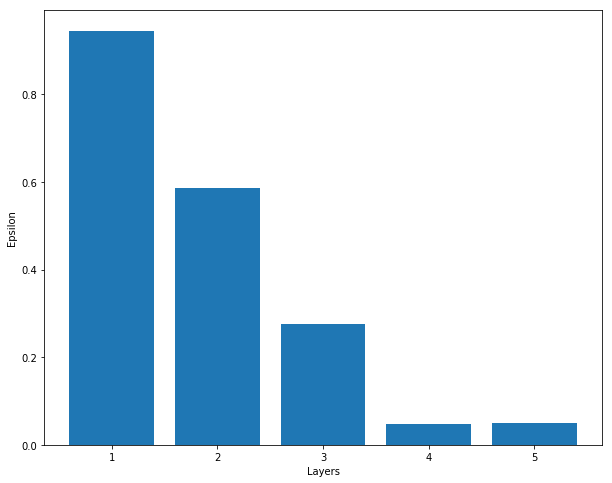

In [4]:
plt.bar(['1','2','3','4','5'],np.transpose(epsilon)[-1])
plt.xlabel("Layers")
plt.ylabel("Epsilon")
plt.show()